<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/Hw6_clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [65]:
# Downloading data and describe for first dataset
url = "https://raw.githubusercontent.com/Natalkina/datasets/main/data_2d.csv"
X = pd.read_csv(url, header=None, names=['Column1', 'Column2', 'Column3'])
print(X.shape)
stat_summary = X.describe()
print(stat_summary)
X.head(3)

(200, 3)
          Column1     Column2     Column3
count  200.000000  200.000000  200.000000
mean     0.500000    1.758886    2.211502
std      0.501255    1.239986    1.605176
min      0.000000   -1.488928   -1.344141
25%      0.000000    0.874456    0.955211
50%      0.500000    1.729753    2.282891
75%      1.000000    2.701499    3.602253
max      1.000000    4.554605    5.722027


,Column1,Column2,Column3
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430


In [66]:
# Normalization
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_sc, columns=X.columns)

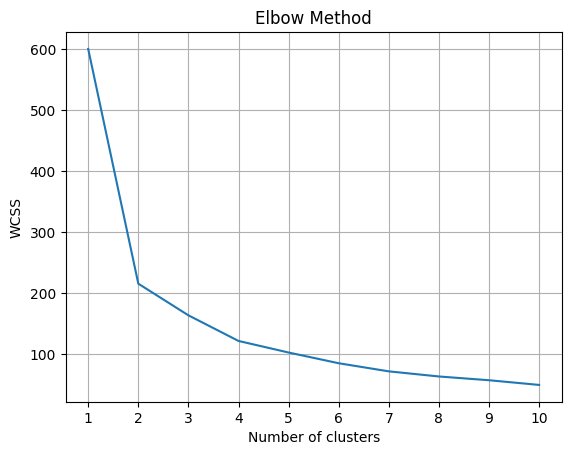

In [67]:
# Elbow method
X_2d = X_scaled.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


[[ 1.          0.56518053  0.82493211]
 [-0.96078431 -0.54301659 -0.79258183]]


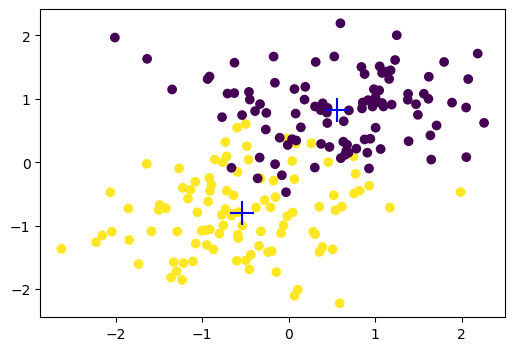

In [68]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, random_state=1)
kmeans.fit(X_2d)

kmeans.labels_
X_scaled['cluster'] = kmeans.labels_
labels = kmeans.predict(X_2d)
centroids = kmeans.cluster_centers_
print(centroids)

fig = plt.figure(figsize = (6, 4))

plt.scatter(X_2d[:, 1],X_2d[:, 2], c=labels, cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], marker='+',  c='blue', s=300)
plt.show()


In [70]:
url2 = "https://raw.githubusercontent.com/Natalkina/datasets/main/mnist.csv"
X_mnist = pd.read_csv(url2, header=None)
print(X_mnist.shape)
X_mnist.head(3)

(500, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# 1. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_mnist)

# 2. Apply PCA
pca = PCA(2)
principalComponents = pca.fit_transform(df_scaled)

# 3. Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC' + str(x) for x in range(1, len(X_mnist.columns[:2])+1)])
print(principalDf.shape)
display(principalDf.head(2))

(500, 2)


,PC1,PC2
0,-4.528447,4.195992
1,5.025793,-12.464813


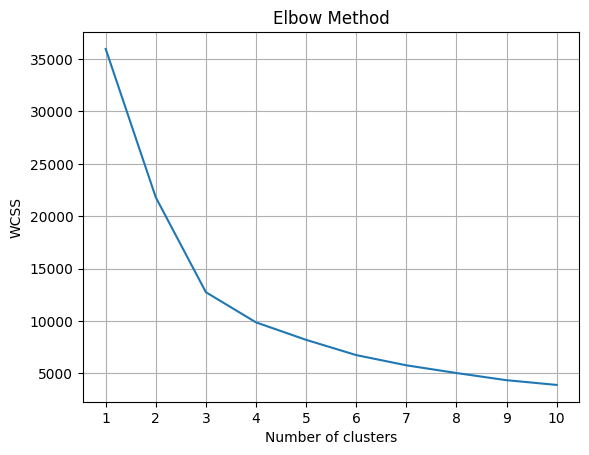

In [83]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


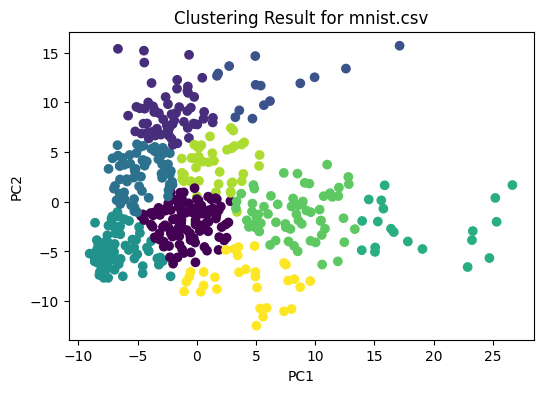

In [91]:
kmeans = KMeans(init='random', n_clusters=9, n_init=10, random_state=1)
kmeans.fit(principalDf)

kmeans.labels_
principalDf['cluster'] = kmeans.labels_
labels = kmeans.predict(principalDf)

fig = plt.figure(figsize = (6, 4))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering Result for mnist.csv')
plt.show()